In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tqdm import tqdm
%matplotlib inline

In [3]:
# ls

# データの確認

In [43]:
idPATH = 'dataset/img/TROUSERS/Summer_Wear/'

In [44]:
files = sorted([f for f in os.listdir(idPATH)]) #sorted by id
# files[:10]

In [45]:
items = sorted([i for i in os.listdir(idPATH+files[0])])
items.remove('.ipynb_checkpoints')

In [46]:
len(files)

3514

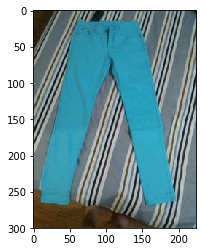

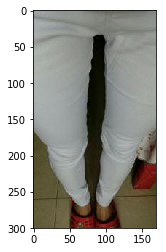

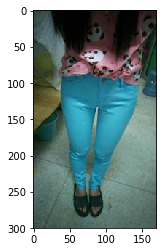

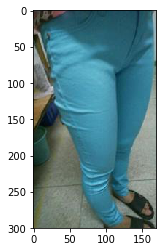

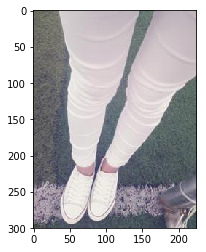

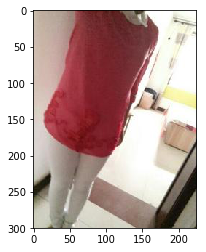

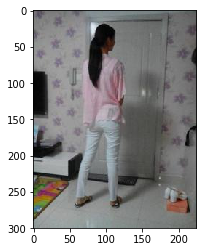

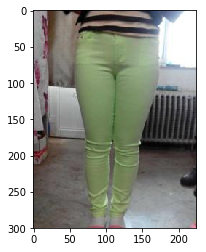

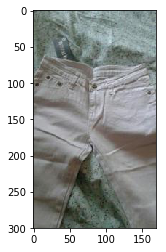

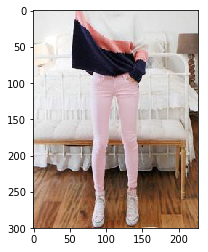

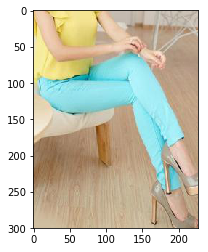

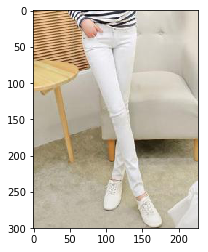

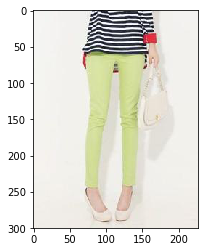

In [47]:
for i in range(len(items)):
    img = np.array(Image.open(idPATH+files[0]+'/'+items[i]))
    plt.imshow(img)
    plt.show()

###  read bounding box
Need to remove return key while reading

In [7]:
# with open('./dataset/list_bbox_consumer2shop.txt','r') as f:
#     texts = f.readlines()
#     for i,text in enumerate(texts):
#         texts[i] = text.strip()

In [8]:
# len(texts)

### Meaning of columns
- image_name： file name
- clothes_type: clothes category
- source_type: 1 = shop image, 2 = consumer image
- x_1 y_1 x_2 y_2: four corners of bounding box

`list_bbox_consumer2shop.txt`をパスとBounding Boxに分割する
- スペースでsplit()した後長さが0より大きいものとして分割

In [9]:
# # extract strings example
# item_num = 80000
# example = [x for x in texts[i].split(' ') if len(x) > 0]
# print(example)

Bounding Box情報を変数に格納する

In [10]:
# x1,y1,x2,y2=int(example[3]),int(example[4]),int(example[5]),int(example[6])

In [11]:
# img_path = './dataset/'+example[0]
# img_path

In [12]:
# img = np.array(Image.open(img_path))
# plt.imshow(img)
# plt.show()

In [13]:
# imgcv2 = cv2.rectangle(img, (x1,y1), (x2,y2),(100,200,100),3)
# plt.imshow(imgcv2)
# plt.title(img_path)
# plt.show()

## カテゴリごとにデータを分割する
first extract tshirts_list from 'list_bbox_consumer2shop.txt'

parseした文字列のPATHの部分に対象のカテゴリ名が含まれていたらリストにappendする

In [7]:
with open('./dataset/list_bbox_consumer2shop.txt','r') as f:
    texts = f.readlines()
    for i,text in enumerate(texts):
        texts[i] = text.strip()
print(len(texts))

239559


In [8]:
def extractCategory(texts,categoryName):
    targetList=[]
    for i in range(len(texts)):
        parse = [x for x in texts[i].split(' ') if len(x) > 0]
        if parse[0].count(categoryName) > 0: 
            targetList.append(parse)
    print('Data Length: {}'.format(len(targetList)))
    print('Data Sample:\n{}'.format(targetList[:5]))
    return targetList

In [11]:
categoryList = extractCategory(texts,"Skirt/")

Data Length: 2879
Data Sample:
[['img/DRESSES/Skirt/id_00002172/comsumer_01.jpg', '2', '2', '076', '074', '228', '204'], ['img/DRESSES/Skirt/id_00002645/comsumer_01.jpg', '2', '2', '001', '001', '225', '243'], ['img/DRESSES/Skirt/id_00005083/comsumer_01.jpg', '2', '2', '001', '010', '225', '300'], ['img/DRESSES/Skirt/id_00005083/comsumer_02.jpg', '2', '2', '084', '076', '161', '144'], ['img/DRESSES/Skirt/id_00005770/comsumer_01.jpg', '2', '2', '040', '100', '165', '231']]


### crop the target item area

### ディレクトリ作成と保存
- if there is no directory for a item(one id), make a directory for it.
- ディレクトリが存在しなければ作成する
- `T_Shirts`や`Pants`は複数の大カテゴリ(`CLOTHING`と`TOPS`など)に含まれるため，別途でディレクトリを結合する必要がある．

In [17]:
# operation test
def saveImages(categoryList,datasetPath):
    for i,cList in enumerate(tqdm(categoryList)):
        x1,y1,x2,y2=int(cList[3]),int(cList[4]),int(cList[5]),int(cList[6])
        img_path = datasetPath+cList[0]
        dirName = cList[0].split('/')
        # TOP Layer('img')
        centerPath = datasetPath+'crop_img/'
        os.listdir(centerPath)
        
        h0 = centerPath+dirName[0]
        if dirName[0] not in os.listdir(centerPath):
            os.mkdir(h0)
        # 2nd Layer(large category:'CLOTHING','DRESSES','TOPS','TROUSERS')
        h1 = h0+'/'+dirName[1]
        if dirName[1] not in os.listdir(h0):
            os.mkdir(h1)
        # 3rd Layer(small category: ex 'T_Shirt','Dress','Blouse','Pants')
        h2 = h1+'/'+dirName[2]
        if dirName[2] not in os.listdir(h1):
            os.mkdir(h2)
        # 4th Layer(id)
        h3 = h2+'/'+dirName[3]
        if dirName[3] not in os.listdir(h2):
            os.mkdir(h3)

        # cropping
        cropped_img = Image.open(img_path).crop((x1,y1,x2,y2))
        cropped_img.save(centerPath+cList[0])

In [18]:
saveImages(categoryList=categoryList, datasetPath='dataset/')

100%|██████████| 18713/18713 [02:45<00:00, 113.09it/s]


In [6]:
len(os.listdir('./dataset/crop_img/img/TOPS/Coat/'))

2433

In [7]:
len(os.listdir('./dataset/crop_img/img/CLOTHING/Pants/'))

597

In [8]:
len(os.listdir('./dataset/crop_img/img/TROUSERS/Pants/'))

2196

In [10]:
len(os.listdir('./dataset/crop_img/img/CLOTHING/Coat/'))

7